The following script will take data files output by the *COGNISION(tm)* EEG system developed by [Neuronetrix](http://neuronetrix.com/cognision-i-26.html). The script find the grand average, and plot the resulting event-related potentials (ERPs). The Cognision system is a 7-electrode system used for both clinical and research purposes. In this example, we take the grand average of all the midline electrodes (FZ, CZ, PZ) from five individuals.

**First, import all the important libraries you need.** Specifically with respect to dialog boxes and data manipulation.

library(readxl)
library(plyr)

**Next, set your working directory.**

In [4]:
setwd('/media/mihcelle/ChelleUSB/Cognision')

**Now we want to read in all the files that end in .xlsx in that directory.** We can achieve that using the `list.files` function. Specifically we set the pattern "*.xlsx" to find all files ending in .xlsx. We could swap it out with .csv if we chose to.

In [6]:
file_list <- list.files(pattern = "*.xlsx")
print(file_list)

[1] "2490_1572_average.xlsx" "2504_2098_average.xlsx" "2514_1748_average.xlsx"
[4] "2536_1455_average.xlsx" "3097_1981_average.xlsx"


**We have to create a function that will read in sheet #3 for each .xlsx file.** The third sheet has all the data we need. We need to create a function to do this for later on (you'll see in the next few steps). Here, we create a function called `read_excel_sheet()`.

In [7]:
read_excel_sheet <- function(x){
  sheet = 3
  read_excel(x, sheet = sheet)
}

**All .xlsx files will be read into a list.** This list will consist of multiple data frames, with each data frame corresponding to a subject's data. The list is named `myfiles`. Here, we use the `lapply` function to read in all the .xlsx files, the call the `read_excel_sheet` function to work it's magic.

In [8]:
myfiles <- lapply(file_list, read_excel_sheet)
head(myfiles[[1]],10)

Time,FZ,CZ,PZ,F3,P3,F4,P4,Stimulus
-240,1.452119,1.0803593,1.959820,0.964300,0.67854448,0.6114983,0.494051829,1
-232,1.666204,1.1622018,1.883526,1.338371,0.92314748,0.9929680,0.293375691,1
-224,1.486798,1.0600142,1.821104,1.383223,0.85471411,0.5527750,0.119055512,1
-216,1.253292,1.0179369,2.010683,1.089607,0.80246432,0.1995110,0.331291423,1
-208,1.196881,1.0960804,2.064782,1.017012,0.72940708,0.4330167,0.385390735,1
-200,1.176073,1.1834717,1.985252,1.092844,0.93054571,0.4191451,0.230028542,1
-192,1.271788,1.2819602,2.022705,1.228786,1.39616996,0.2762673,0.247599264,1
-184,1.447957,1.1395449,1.800297,1.343458,1.05169124,0.5754321,-0.005789109,1
-176,1.378599,0.7372677,1.239883,1.280573,0.06865528,0.9689239,-0.555567928,1
-168,1.230173,0.6734582,1.176998,1.099780,-0.02382222,0.8685858,-0.575450552,1


**We now make use of `plyr`** Specifically the `aaply` and `laply` functions in plyr. `aaply` will split an array, apply a function, then return it as an array (in our case, a matrix). We embed the `laply` function because we want to iterate across a set of data.frames in a list. 

**Ultimately, what this will do is find the element means for all cells across ALL data frames in the list.** This will result in a single data frame of grand averages. The grand average data frame is titled `averages`.

In [9]:
averages <- aaply(laply(myfiles, as.matrix), c(2,3), mean)
averages <- as.data.frame(averages)
head(averages, 10)

Time,FZ,CZ,PZ,F3,P3,F4,P4,Stimulus
-240,-0.03982083,0.3496945,0.6680020,0.007620148,0.4417096,-0.04758894,0.5582312,1
-232,0.27774694,0.7235810,0.9916733,0.498490760,0.8350164,0.21809895,0.8020944,1
-224,0.46991522,0.9843676,1.1883730,0.690751512,1.0950632,0.32565029,0.9287886,1
-216,0.31612512,0.8956817,1.0820238,0.389829698,0.8434319,0.11859316,0.7878529,1
-208,0.08104728,0.7307943,0.9000281,0.180923008,0.4983058,-0.14154609,0.6327681,1
-200,0.06162700,0.7772180,0.9642075,0.328609567,0.6398889,-0.21469578,0.6304562,1
-192,0.14911074,0.9134373,1.1009817,0.558971055,0.9081661,-0.12397537,0.6300863,1
-184,0.14587402,0.8741344,1.0436457,0.679654199,0.8442642,-0.04315002,0.4560436,1
-176,0.03462356,0.6990745,0.8907804,0.581905489,0.5718254,-0.10122587,0.2760823,1
-168,-0.18038664,0.5577688,0.8659039,0.340539179,0.4932195,-0.28155705,0.3201941,1


**Now we utilize the `subset` function to split the dataframe to their respective stimulus numbers**. The subset function goes as follows: x<-subset(data_frame, "argument to subset"). In our example, we subset `averages`, and set the subsetting argument sutch that the Stimulus column is equal to 1, 2, or 3. These are assigned to `stim_1_avg`, `stim_2_avg`, `stim_3_avg` respectively.

In [10]:
stim_1_avg <- subset(averages, averages$Stimulus == 1)
stim_2_avg <- subset(averages, averages$Stimulus == 2)
stim_3_avg <- subset(averages, averages$Stimulus == 3)

**Finally, we get to plotting.** We use the basic base-R plotting functions here, but you could use the `ggplot` package if you wanted nicer plots. Each plot has a lot of arguments, so check out ?plot, ?lines, and ?legend to understand them. I'll go through the plots more generally step by step.

`plot()` calls the plotting function. Note we first build the plot using the `stim_1_avg` data first. The `lines()` function will overlay additional lines on the original plot, in this case, using `stim_avg_2`. We do the same with `stim_avg_3`. Note that we call the "Time" and "FZ" columns to plot.

`line_names()` specifies the line names for a legend. `legend()` will place a legend on the figure, consisting of our line names (which is used in the argument.)

**Running all this, we get our plot for FZ below!**

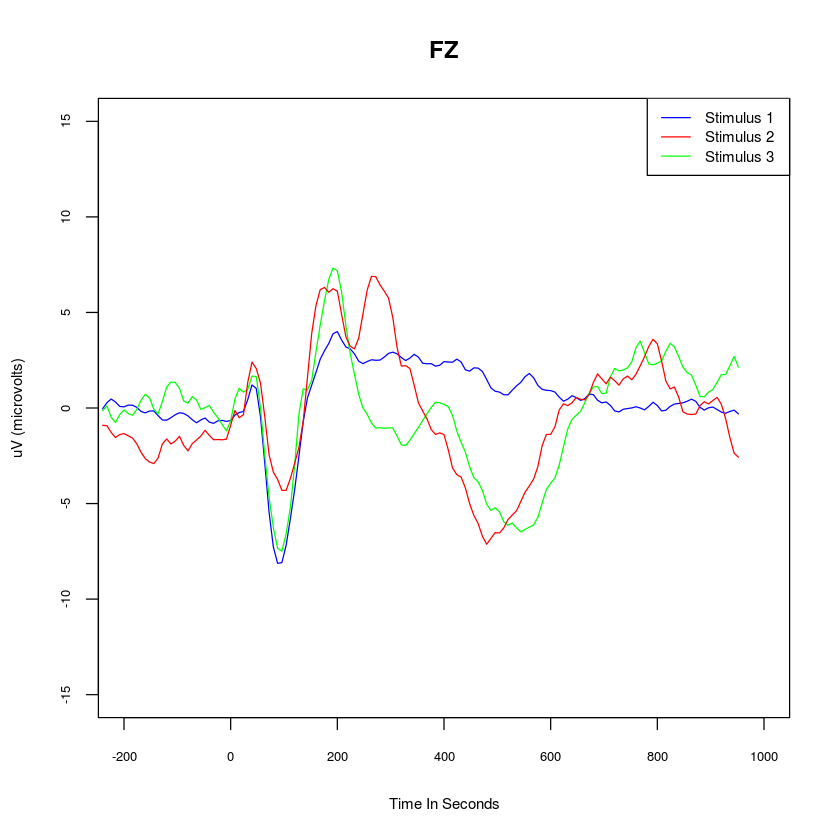

In [15]:
plot(stim_1_avg[c("Time", "FZ")], type = 'l', xlab = "Time In Seconds", ylab = "uV (microvolts)", xlim=c(-200,1000), ylim=c(-15,15), main = "FZ", col = "blue", cex.lab = .75, cex.axis = .65)
lines(stim_2_avg[c("Time", "FZ")], col = "green")
lines(stim_3_avg[c("Time", "FZ")], col = "red")
line_names <-c("Stimulus 1", "Stimulus 2", "Stimulus 3")
legend('topright', line_names, col = c("blue", "red", "green"), lty = 1, cex = .75)

**We can do the same for plotting CZ.**

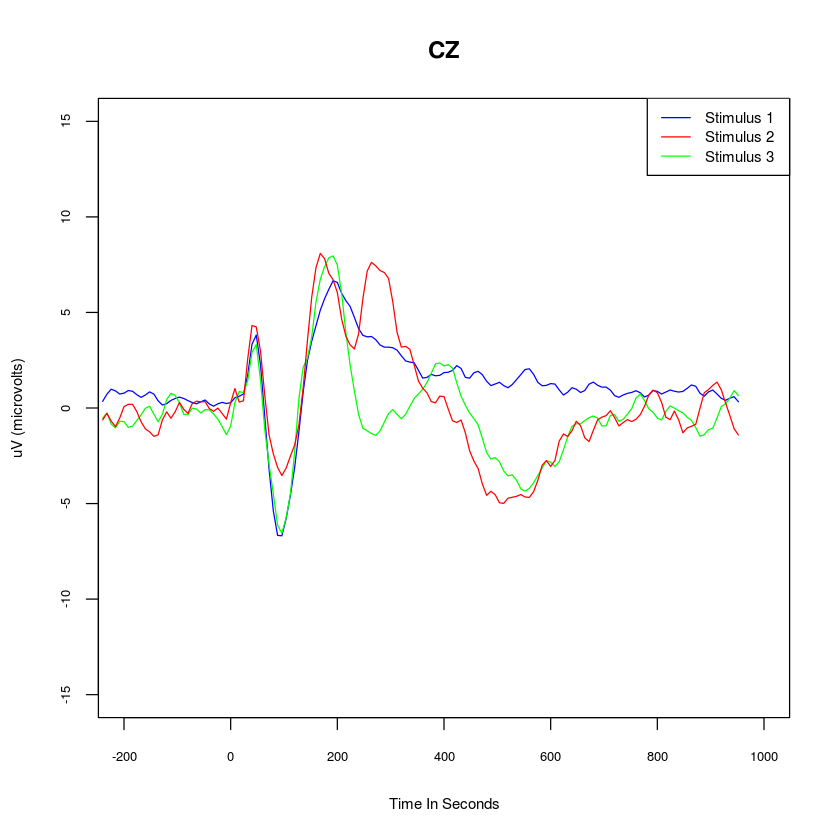

In [16]:
plot(stim_1_avg[c("Time", "CZ")], type = 'l', xlab = "Time In Seconds", ylab = "uV (microvolts)", xlim=c(-200,1000), ylim=c(-15,15), main = "CZ", col = "blue", cex.lab = .75, cex.axis = .65)
lines(stim_2_avg[c("Time", "CZ")], col = "green")
lines(stim_3_avg[c("Time", "CZ")], col = "red")
line_names <-c("Stimulus 1", "Stimulus 2", "Stimulus 3")
legend('topright', line_names, col = c("blue", "red", "green"), lty = 1, cex = .75)

**And PZ!**

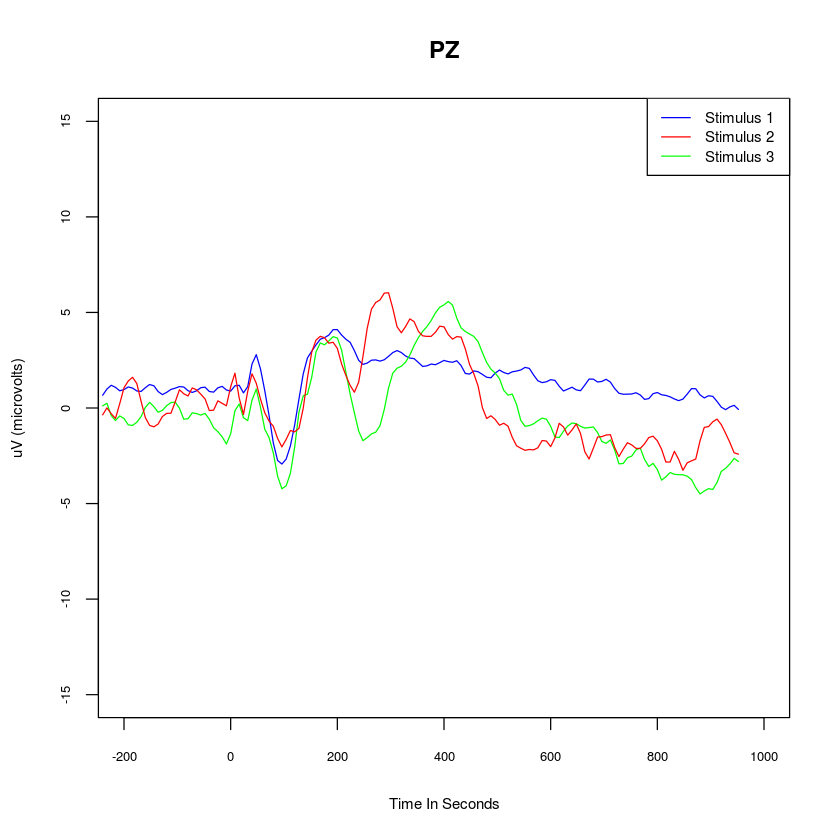

In [17]:
plot(stim_1_avg[c("Time", "PZ")], type = 'l', xlab = "Time In Seconds", ylab = "uV (microvolts)", xlim=c(-200,1000), ylim=c(-15,15), main = "PZ", col = "blue", cex.lab = .75, cex.axis = .65)
lines(stim_2_avg[c("Time", "PZ")], col = "green")
lines(stim_3_avg[c("Time", "PZ")], col = "red")
line_names <-c("Stimulus 1", "Stimulus 2", "Stimulus 3")
legend('topright', line_names, col = c("blue", "red", "green"), lty = 1, cex = .75)

**So in conclusion, this script will plot grand average data with minor modifications.** I hope this is helpful!